In [1]:
#Import libraires
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

plt.style.use("ggplot")
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)

In [2]:
#Read in movies data
movies_df = pd.read_csv("/Users/johnrock/Desktop/movies.csv", encoding='latin-1')

In [3]:
#Examine first few rows of data
movies_df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [4]:
#Look for any missing data
import numpy as np

for col in movies_df.columns:
    pct_missing = np.mean(movies_df[col].isnull())
    print("Percent missing for " + str(col) + ": " + str(pct_missing) + "%")

Percent missing for budget: 0.0%
Percent missing for company: 0.0%
Percent missing for country: 0.0%
Percent missing for director: 0.0%
Percent missing for genre: 0.0%
Percent missing for gross: 0.0%
Percent missing for name: 0.0%
Percent missing for rating: 0.0%
Percent missing for released: 0.0%
Percent missing for runtime: 0.0%
Percent missing for score: 0.0%
Percent missing for star: 0.0%
Percent missing for votes: 0.0%
Percent missing for writer: 0.0%
Percent missing for year: 0.0%


In [5]:
#Check data types of columns
movies_df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [6]:
#Convert gross and budget to ints

movies_df['budget'] = movies_df['budget'].astype('int64')
movies_df['gross'] = movies_df['gross'].astype('int64')

In [7]:
movies_df.dtypes

budget        int64
company      object
country      object
director     object
genre        object
gross         int64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [8]:
movies_df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [9]:
#Create correct year column
movies_df['yearcorrect'] = movies_df['released'].astype(str).str[:4]

movies_df.tail(10)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
6810,0,StudioCanal,UK,Susanna White,Crime,3152725,Our Kind of Traitor,R,2016-09-30,108,6.2,Carlos Acosta,13857,John le Carré,2016,2016
6811,8500000,CBS Films,USA,Steve Carr,Animation,19985196,Middle School: The Worst Years of My Life,PG,2016-10-07,92,6.1,Griffin Gluck,4556,Chris Bowman,2016,2016
6812,0,Killer Films,USA,Andrew Neel,Drama,23020,Goat,R,2016-09-23,96,5.7,Ben Schnetzer,4439,David Gordon Green,2016,2016
6813,0,Anna Biller Productions,USA,Anna Biller,Comedy,228894,The Love Witch,UNRATED,2017-03-10,120,6.2,Samantha Robinson,6054,Anna Biller,2016,2017
6814,20000000,LD Entertainment,USA,Kevin Reynolds,Action,36874745,Risen,PG-13,2016-02-19,107,6.3,Joseph Fiennes,19084,Kevin Reynolds,2016,2016
6815,0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497,Absolutely Fabulous: The Movie,R,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016,2016
6816,0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368,Mothers and Daughters,PG-13,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016,2016
6817,3500000,Warner Bros. Animation,USA,Sam Liu,Animation,3775000,Batman: The Killing Joke,R,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016,2016
6818,0,Borderline Presents,USA,Nicolas Pesce,Drama,25981,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalhães,6947,Nicolas Pesce,2016,2016
6819,0,Les Productions du Trésor,France,Nicole Garcia,Drama,37757,From the Land of the Moon,R,2017-07-28,120,6.7,Marion Cotillard,2411,Milena Agus,2016,2017


In [10]:
movies_df.sort_values(by = ['gross'], inplace = False, ascending = False)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,0,Zentropa International Norway,Norway,Petter Næss,Action,547,Into the White,R,2013-04-12,104,7.2,Florian Lukas,16609,Ole Meldgaard,2012,2013
5699,0,Isle of Man Film,UK,Sheree Folkson,Comedy,542,The Decoy Bride,PG,2012-03-09,89,6.2,Kelly Macdonald,9018,Neil Jaworski,2011,2012
6066,0,Cinetel Films,USA,Steven R. Monroe,Crime,441,I Spit on Your Grave 2,R,2014-01-19,106,5.7,Jemma Dallender,21070,Neil Elman,2013,2014
2594,15000000,Daybreak,USA,George Huang,Comedy,309,Trojan War,PG-13,1997-10-01,84,5.7,Will Friedle,5034,Andy Burg,1997,1997


In [11]:
#Drop any duplicates

movies_df.drop_duplicates()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497,Absolutely Fabulous: The Movie,R,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016,2016
6816,0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368,Mothers and Daughters,PG-13,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016,2016
6817,3500000,Warner Bros. Animation,USA,Sam Liu,Animation,3775000,Batman: The Killing Joke,R,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016,2016
6818,0,Borderline Presents,USA,Nicolas Pesce,Drama,25981,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalhães,6947,Nicolas Pesce,2016,2016


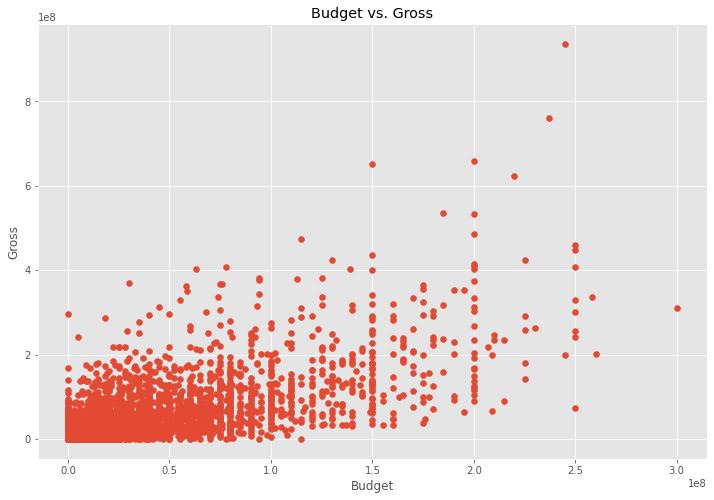

In [12]:
#Build scatterplot of budget and gross revenue

plt.scatter(x = movies_df['budget'], y = movies_df['gross'])
plt.title("Budget vs. Gross")
plt.xlabel("Budget")
plt.ylabel("Gross")
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

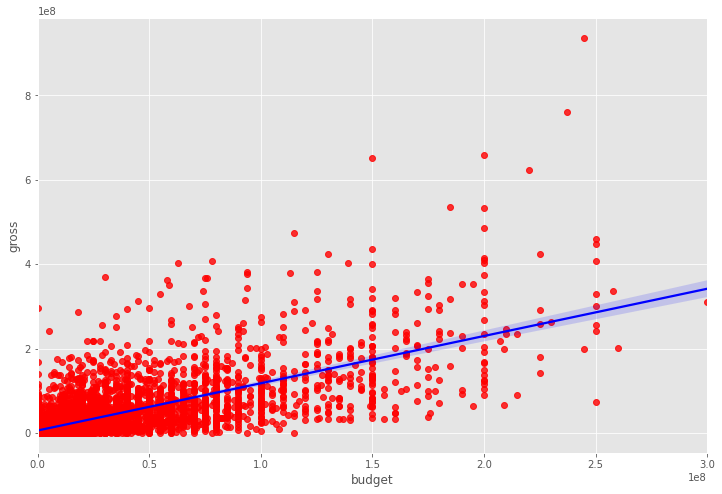

In [13]:
#Plot regression line
sns.regplot(x = 'budget', y = 'gross', data = movies_df, scatter_kws = {'color': 'red'}, line_kws = {'color' : 'blue'})

In [14]:
#Look at correlation

movies_df.corr()

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


In [15]:
#High correlation between budget and gross

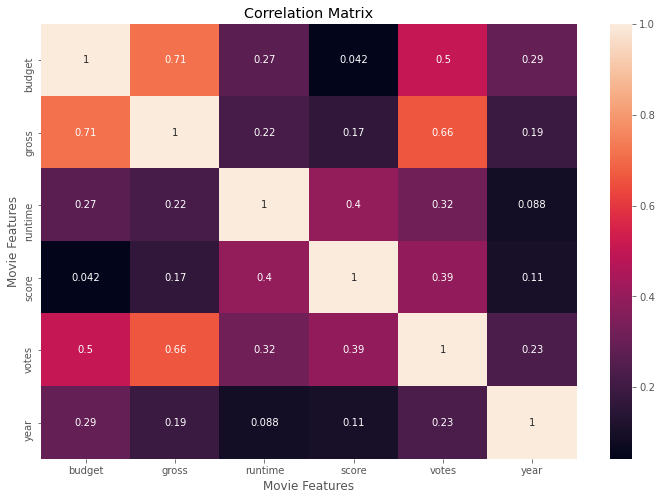

In [16]:
correlation_matrix = movies_df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation Matrix")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

plt.show()

In [17]:
movies_df_numerized = movies_df

for column in movies_df_numerized.columns:
    if movies_df_numerized[column].dtype == "object":
        movies_df_numerized[column] = movies_df_numerized[column].astype('category')
        movies_df_numerized[column] = movies_df_numerized[column].cat.codes
        
movies_df_numerized

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
0,8000000,665,54,2192,1,52287414,4661,8,39,89,8.1,2454,299174,3716,1986,0
1,6000000,1680,54,1296,4,70136369,1821,7,27,103,7.8,1605,264740,1970,1986,0
2,15000000,1680,54,2645,0,179800601,6203,6,23,110,6.9,2345,236909,1852,1986,0
3,18500000,2062,54,1066,0,85160248,295,8,33,137,8.4,2192,540152,1629,1986,0
4,9000000,2122,54,2123,1,18564613,1872,6,36,90,6.9,1139,36636,2549,1986,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0,1013,53,1623,4,4750497,230,8,2335,91,5.4,1066,9161,1800,2016,30
6816,0,1914,54,1989,6,28368,3430,7,2320,90,4.9,2146,1959,3008,2016,30
6817,3500000,2124,54,2313,2,3775000,577,8,2336,76,6.5,1355,36333,450,2016,30
6818,0,415,54,1914,6,25981,5272,8,2361,76,6.2,1370,6947,2946,2016,30


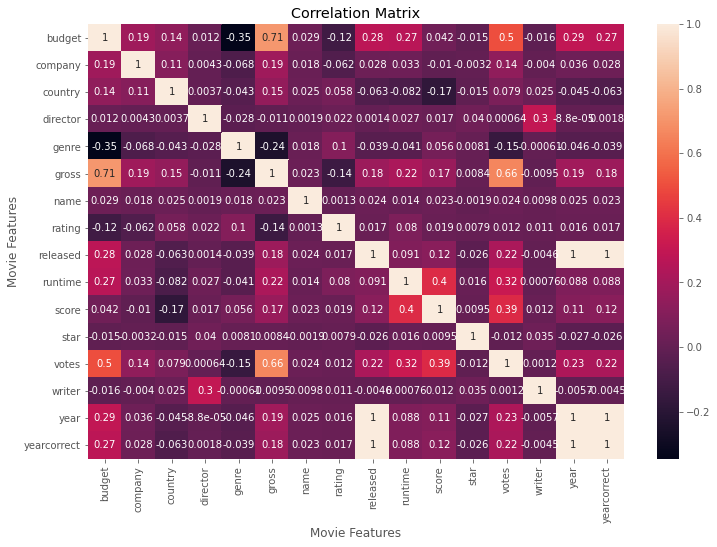

In [18]:
#New correlation matrix with strings converted to numerical values
correlation_matrix = movies_df_numerized.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation Matrix")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

plt.show()

In [19]:
correlation_matrix = movies_df_numerized.corr()
correlation_pairs = correlation_matrix.unstack()

correlation_pairs

budget       budget         1.000000
             company        0.187205
             country        0.137635
             director       0.011602
             genre         -0.346794
                              ...   
yearcorrect  star          -0.026050
             votes          0.220797
             writer        -0.004546
             year           0.996229
             yearcorrect    1.000000
Length: 256, dtype: float64

In [20]:
sorted_pairs = correlation_pairs.sort_values()

sorted_pairs

genre        budget        -0.346794
budget       genre         -0.346794
gross        genre         -0.242676
genre        gross         -0.242676
score        country       -0.174414
                              ...   
director     director       1.000000
country      country        1.000000
company      company        1.000000
year         year           1.000000
yearcorrect  yearcorrect    1.000000
Length: 256, dtype: float64

In [21]:
high_correlation = sorted_pairs[(sorted_pairs) > 0.5]

high_correlation

votes        budget         0.503924
budget       votes          0.503924
votes        gross          0.662457
gross        votes          0.662457
             budget         0.712196
budget       gross          0.712196
released     year           0.996187
year         released       0.996187
yearcorrect  year           0.996229
year         yearcorrect    0.996229
yearcorrect  released       0.999389
released     yearcorrect    0.999389
budget       budget         1.000000
writer       writer         1.000000
votes        votes          1.000000
star         star           1.000000
score        score          1.000000
runtime      runtime        1.000000
released     released       1.000000
rating       rating         1.000000
name         name           1.000000
gross        gross          1.000000
genre        genre          1.000000
director     director       1.000000
country      country        1.000000
company      company        1.000000
year         year           1.000000
y

In [22]:
#Votes and budget have the highest correlation to gross revenue
#Company does not have a high correlation to gross revenue